In [1]:
import numpy as np
from astropy.table import Table
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Read in bow shock data from Kobulnicky:2017a

In [2]:
tab01 = Table.read("data/Kobulnicky2017/J_AJ_154_201_table1.dat.fits")

Remove coordinate columns that we do not want. Also the color temperatures. *And we have to remove the Name field*. This is because of inconsitencies between the names in the different tables, which cause problems when we merge.

In [3]:
tab01.remove_columns(
   [
       'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs',
       'T70/160', 'Name',
   ]
)

In [4]:
tab01[300:310]

ID,Rad,Height,l_F3.6,F3.6,l_F4.5,F4.5,l_F5.8,F5.8,l_F8.0,F8.0,F24,l_F70,F70,l_F160,F160,I70,T24/70
,arcsec,arcsec,,Jy,,Jy,,Jy,,Jy,Jy,,Jy,,Jy,Jy / arcmin2,K
int32,int32,int32,str1,float64,str1,float64,str1,float64,str1,float64,float64,str1,float64,str1,float64,float64,int32
311,6,5,<,0.005,<,0.05,<,0.017,<,0.041,1.43,<,0.55,<,0.38,-99.9,-99
312,5,5,<,0.011,<,0.004,<,0.015,<,0.031,1.11,<,0.24,<,0.17,-99.9,-99
314,5,8,<,0.023,<,0.015,<,0.021,<,0.006,1.559,,0.45,<,0.05,3.5,271
331,33,30,<,0.036,<,0.024,<,0.032,<,0.017,28.45,,12.72,<,4.8,17.6,195
332,21,34,<,0.125,<,0.097,<,0.378,<,0.819,6.096,<,18.5,<,11.1,-99.9,-99
333,11,12,<,0.014,<,0.013,<,0.063,<,0.241,6.22,,8.99,<,2.5,17.6,116
334,12,13,<,0.004,<,0.004,<,0.005,<,0.005,0.463,,1.45,<,0.17,7.0,93
335,20,16,<,0.05,<,0.034,<,0.142,<,0.265,2.582,<,4.43,<,3.01,-99.9,-99


Indicate lower limit fluxes by negative values, as in the published table: 

In [5]:
for band in 'F3.6', 'F4.5', 'F5.8', 'F8.0', 'F70', 'F160':
    lband = 'l_' + band
    m = tab01[lband] == '<'
    tab01[band][m] = -tab01[band][m]
    tab01.remove_column(lband)

In [6]:
tab01

ID,Rad,Height,F3.6,F4.5,F5.8,F8.0,F24,F70,F160,I70,T24/70
,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,int32
1,38,44,-0.074,-0.15,-0.086,0.255,8.73,28.3,-22.0,126.5,92
2,16,25,-0.258,-0.149,-0.114,0.041,0.453,0.45,-2.0,24.6,132
3,13,21,-0.139,-0.12,-0.23,0.71,13.305,39.0,-20.0,372.6,95
4,17,19,-0.065,-0.375,-0.062,0.108,1.023,3.91,-7.0,355.0,89
5,12,23,-0.055,-0.038,-0.02,-0.01,0.273,-0.4,-3.8,-99.9,-99
6,11,17,-0.086,-0.061,-0.059,-0.025,0.37,1.3,-6.4,56.2,90
7,13,13,0.103,0.106,0.496,1.311,0.83,21.7,10.6,179.3,61
8,10,12,-0.083,-0.25,-0.056,-0.093,0.609,4.7,2.4,59.8,76


In [7]:
tab02 = Table.read("data/Kobulnicky2017/J_AJ_154_201_table2.dat.fits")

In [8]:
tab02.remove_columns(
   [
       'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs',
       'T70/160', 'Name',
   ]
)
for band in 'F3.4', 'F4.6', 'F12', 'F70', 'F160':
    lband = 'l_' + band
    m = tab02[lband] == '<'
    tab02[band][m] = -tab02[band][m]
    tab02.remove_column(lband)

In [9]:
tab02[20:30]

ID,Rad,Height,F3.4,F4.6,F12,F22,F70,F160,I70,T22/70
,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,int32
324,29,22,-0.015,-0.008,-0.033,0.213,-0.41,-0.54,-99.9,-99
325,15,14,-0.04,-0.045,0.042,0.195,-99.999,-99.999,-99.9,-99
326,22,16,-0.004,-0.005,-0.005,0.123,-99.999,-99.999,-99.9,-99
327,15,7,-0.004,-0.004,0.254,1.266,4.38,-2.12,38.7,98
328,16,12,-0.002,-0.003,-0.004,0.039,-99.999,-99.999,-99.9,-99
330,30,19,-0.159,-0.108,-0.153,0.636,-0.87,-0.57,-99.9,-99
343,300,190,-0.264,-0.187,10.798,148.857,-99.999,-99.999,-99.9,-99
344,171,108,-0.066,-0.115,18.036,141.124,482.2,134.8,52.7,98


There is something wrong with Table 5.  There is an integer column that contains `'---'` strings, which need dealing with or the reader will crash. This doesn't seem to be possible with the FITS table reader, so we resort to ascii, where we can fix it with the `fill_values` parameter.

In [10]:
tab05 = Table.read("data/Kobulnicky2017/table5.dat", 
                   fill_values=[('---', -1)], 
                   format='ascii.cds', 
                   readme="data/Kobulnicky2017/ReadMe")

In [11]:
tab05.remove_columns(
    [
        'TSS', 'T22/T70', 'T70/160', 
    ]
)

In [12]:
import astropy.units as u

In [13]:
import astropy.constants as const

In [14]:
tab05['LIR'] = tab05['FIR'].to(u.erg/u.cm**2/u.s)*4*np.pi*(tab05['Dist']*1e3*u.parsec).to(u.cm)**2 / const.L_sun.to(u.erg/u.s)

In [15]:
tab05

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028


In [16]:
from astropy.table import join

In [17]:
tab05_01 = join(tab05, tab01, keys=('ID'), join_type='left')
tab05_01.remove_columns(['F3.6', 'F4.5', 'F5.8',])
tab05_01

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad,Height,F8.0,F24,F70,F160,I70,T24/70
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,int32
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,--,--,--,--,--,--,--,--
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9,9,0.31,27.659,4.41,-5.4,38.7,708
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33,30,-0.017,28.45,12.72,-4.8,17.6,195
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24,16,1.179,32.85,55.63,-18.07,98.4,110
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108,66,-0.34,31.116,40.7,-5.5,31.6,120
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30,25,-0.278,10.669,11.98,-5.91,-99.9,126
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18,10,0.383,0.773,8.99,5.25,49.2,70


In [18]:
tab05_01_02 = join(tab05_01, tab02, keys=('ID'), join_type='left')
tab05_01_02.remove_columns(['F3.4', 'F4.6',])
tab05_01_02

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad_1,Height_1,F8.0,F24,F70_1,F160_1,I70_1,T24/70,Rad_2,Height_2,F12,F22,F70_2,F160_2,I70_2,T22/70
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,int32
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,--,--,--,--,--,--,--,--,173,404,51.32,343.77,246.7,61.55,9.8,158
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9,9,0.31,27.659,4.41,-5.4,38.7,708,--,--,--,--,--,--,--,--
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33,30,-0.017,28.45,12.72,-4.8,17.6,195,--,--,--,--,--,--,--,--
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24,16,1.179,32.85,55.63,-18.07,98.4,110,--,--,--,--,--,--,--,--
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108,66,-0.34,31.116,40.7,-5.5,31.6,120,--,--,--,--,--,--,--,--
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30,25,-0.278,10.669,11.98,-5.91,-99.9,126,--,--,--,--,--,--,--,--
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18,10,0.383,0.773,8.99,5.25,49.2,70,--,--,--,--,--,--,--,--


Now merge the WISE and Spitzer photometry, taking (8, 12) and (22, 24) as equivalent.

In [19]:
# Make a mask that is true for rows with Spitzer photometry
m_sst = ~tab05_01_02['Rad_1'].mask
m_wise = ~tab05_01_02['Rad_2'].mask
m_sst, m_wise

(array([False,  True, False,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False,  True,  True,  True,
         True, False], dtype=bool),
 array([ True, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False,  True], dtype=bool))

In [20]:
groups = [
    ['Rad_1', 'Rad_2', 'Rad'],
    ['Height_1', 'Height_2', 'Height'],
    ['F8.0', 'F12', 'F8 or 12'],
    ['F24', 'F22', 'F24 or 22'],
    ['F70_1', 'F70_2', 'F70'],
    ['F160_1', 'F160_2', 'F160'],
    ['I70_1', 'I70_2', 'I70'],
    ['T24/70', 'T22/70', 'T2x/70'],
]

for sst, wise, merge in groups:
    tab05_01_02[merge] = np.where(m_sst, tab05_01_02[sst], np.where(m_wise, tab05_01_02[wise], np.nan))
    tab05_01_02[merge].mask = ~(m_sst | m_wise)
    tab05_01_02.remove_columns([sst, wise])
tab05_01_02['Observatory'] = np.where(m_sst, 'SST', np.where(m_wise, 'WISE', None))
tab05_01_02

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad,Height,F8 or 12,F24 or 22,F70,F160,I70,T2x/70,Observatory
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,,,,,,,,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,173.0,404.0,51.32,343.77,246.7,61.55,9.8,158.0,WISE
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9.0,9.0,0.31,27.659,4.41,-5.4,38.7,708.0,SST
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--,None
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33.0,30.0,-0.017,28.45,12.72,-4.8,17.6,195.0,SST
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24.0,16.0,1.179,32.85,55.63,-18.07,98.4,110.0,SST
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108.0,66.0,-0.34,31.116,40.7,-5.5,31.6,120.0,SST
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30.0,25.0,-0.278,10.669,11.98,-5.91,-99.9,126.0,SST
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18.0,10.0,0.383,0.773,8.99,5.25,49.2,70.0,SST


Now work out my own IR flux by weighted sum of the 8 to 160 bands

In [21]:
t = tab05_01_02
t.remove_row(2)
t['FIR_will'] = 1e-10*(2.55*np.abs(t['F8 or 12']) + 0.77*t['F24 or 22'] + 0.24*t['F70'])
t['ID', 'FIR', 'FIR_will']

ID,FIR,FIR_will
,mW / m2,
int64,float64,float64
13,6.4e-08,4.547769e-08
67,5.8e-08,2.314633e-09
331,5.3e-09,2.500265e-09
338,6.9e-09,4.165215e-09
339,6e-09,3.459432e-09
341,1.9e-09,1.179923e-09
342,6e-10,3.72946e-10
344,5e-08,2.7038528e-08


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

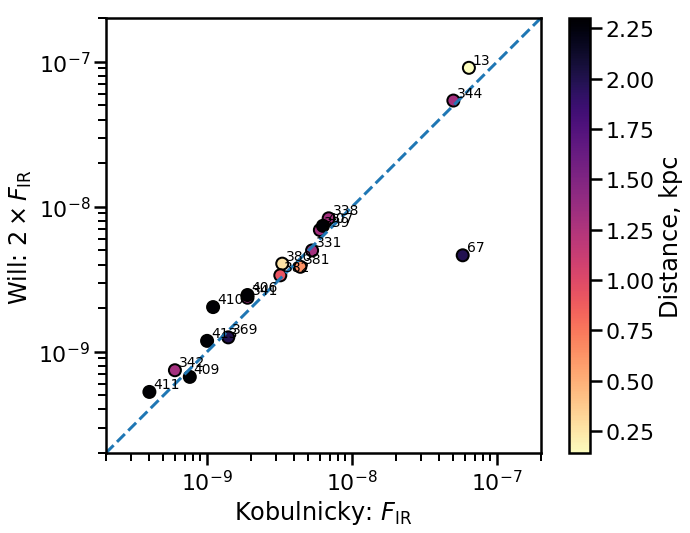

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.scatter(t['FIR'], 2*t['FIR_will'], 
               c=t['Dist'], cmap='magma_r', 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label('Distance, kpc')
for id_, x, y in zip(t['ID'], t['FIR'], 2*t['FIR_will']):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 2e-10, 2e-7
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'Kobulnicky: $F_\mathrm{IR}$',
    ylabel=r'Will: $2 \times F_\mathrm{IR}$',
)
ax.set_aspect('equal')
None

So everything looks OK, except:

1. I had to multiply my fluxes by 2
2. Source 67 is over 10 times too bright in the Kobulnicky table

Now add in the table that I transcribed from the 2018 paper:

In [24]:
tab18 = Table.read('kob18.fits')

In [25]:
join(t, tab18, keys='ID')

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR_1,LIR,Rad,Height,F8 or 12,F24 or 22,F70,F160,I70,T2x/70,Observatory,FIR_will,L4,V3,R0,S7,R0_as,l_as,l/R0,j_-12,D_kpc,FIR_-9,L*/LIR_2
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,,,,,,,,,,,,,,,,,,,,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,173.0,404.0,51.32,343.77,246.7,61.55,9.8,158.0,WISE,4.547769e-08,8.1,1.3,0.175,12.3,299.0,277,0.93,8.7,0.11,64.0,3339.43
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9.0,9.0,0.31,27.659,4.41,-5.4,38.7,708.0,SST,2.314633e-09,5.1,1.3,0.08,64.0,7.5,15,2.0,11.0,1.99,58.0,7.09
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33.0,30.0,-0.017,28.45,12.72,-4.8,17.6,195.0,SST,2.500265e-09,12.0,2.5,0.296,12.0,42.0,55,1.31,8.3,1.32,5.3,414.87
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24.0,16.0,1.179,32.85,55.63,-18.07,98.4,110.0,SST,4.165215e-09,7.9,1.2,0.162,79.8,23.0,29,1.26,8.9,1.32,6.9,209.79
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108.0,66.0,-0.34,31.116,40.7,-5.5,31.6,120.0,SST,3.459432e-09,32.0,2.9,0.493,29.9,70.0,47,0.67,8.3,1.32,6.0,977.24
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30.0,25.0,-0.278,10.669,11.98,-5.91,-99.9,126.0,SST,1.179923e-09,5.1,1.3,0.141,5.0,20.0,31,1.55,8.7,1.32,1.9,491.84
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18.0,10.0,0.383,0.773,8.99,5.25,49.2,70.0,SST,3.72946e-10,1.4,0.8,0.07,57.8,10.0,14,1.4,8.9,1.32,0.6,427.54
344,BD+43 3654,G082.4100+02.3254,O4If,40700,19.0,1.32,193.0,1.24,910.0,5e-08,350.0,2723.05800234,171.0,108.0,18.036,141.124,482.2,134.8,52.7,98.0,WISE,2.7038528e-08,87.0,3.0,1.359,58.6,193.0,170,0.88,8.0,1.32,50.0,318.83
